# Data Science z Python 3.10. Statystyki opisowe
## 🇬🇧 Data Science with Python 3.10. Descriptive statistics
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://www.oronowicz-jaśkowiak.pl/studenci/pjatk

### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [1]:
import os
import pandas as pd

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [2]:
# Anaconda
os.getcwd()
base_data = pd.read_csv("DSP_4.csv")

# Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/')
# base_data = pd.read_csv("DSP_4.csv")

In [3]:
df = pd.read_csv("DSP_4.csv", sep = ';') 

In [4]:
print(df)

    objawy  wiek  choroby  wzrost  leki
0        1   NaN        0   170.0     2
1        1  65.0        0     NaN     3
2        1  55.0        0   182.0     4
3        1  44.0        0   187.0     3
4        1  77.0        0   165.0     2
5        1  64.0        0   164.0     1
6        1  54.0        1   178.0     4
7        1   NaN        1   190.0     3
8        3  76.0        1   200.0     2
9        3  54.0        0   198.0     1
10       3  56.0        0   187.0     2
11       3  68.0        0   167.0     3
12       3   NaN        1   168.0     2
13       3  55.0        1   189.0     1
14       3  44.0        1   177.0     2
15       3  43.0        1   166.0     3
16       2  32.0        1   188.0     4
17       2  23.0        1   198.0     3
18       2  42.0        0   176.0     2
19       2   NaN        0   167.0     1
20       2  11.0        0   159.0     2
21       2  21.0        0   198.0     3
22       2  34.0        1   192.0     4
23       2  32.0        1     NaN     1


In [5]:
df.columns

Index(['objawy', 'wiek', 'choroby', 'wzrost', 'leki'], dtype='object')

In [8]:
df.isnull().any()

objawy     False
wiek        True
choroby    False
wzrost      True
leki       False
dtype: bool

In [9]:
print(df["wiek"].mean())
print(df["wzrost"].mean())

44.163636363636364
183.34545454545454


In [10]:
df_2 = df.fillna(df.mean())

In [11]:
print(df_2)

    objawy       wiek  choroby      wzrost  leki
0        1  44.163636        0  170.000000     2
1        1  65.000000        0  183.345455     3
2        1  55.000000        0  182.000000     4
3        1  44.000000        0  187.000000     3
4        1  77.000000        0  165.000000     2
5        1  64.000000        0  164.000000     1
6        1  54.000000        1  178.000000     4
7        1  44.163636        1  190.000000     3
8        3  76.000000        1  200.000000     2
9        3  54.000000        0  198.000000     1
10       3  56.000000        0  187.000000     2
11       3  68.000000        0  167.000000     3
12       3  44.163636        1  168.000000     2
13       3  55.000000        1  189.000000     1
14       3  44.000000        1  177.000000     2
15       3  43.000000        1  166.000000     3
16       2  32.000000        1  188.000000     4
17       2  23.000000        1  198.000000     3
18       2  42.000000        0  176.000000     2
19       2  44.16363

In [12]:
df_2.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
leki       False
dtype: bool

### 3. Podstawowe statystyki opisowe
#### 🇬🇧 Descriptive statistics

Możemy w łatwy sposób przedstawić podstawowe statystyki dla naszych danych.

In [13]:
print(df["wiek"].mean()) 
print(round(df["wiek"].mean(), 2)) 
print(df["wiek"].median()) 
print(df['wiek'].max()) 
print(df['wiek'].min()) 
print(df['wiek'].var()) 

44.163636363636364
44.16
43.0
77.0
11.0
341.9171717171717


In [14]:
df['wiek'].quantile([.25, .5, .75]) 

0.25    32.0
0.50    43.0
0.75    55.5
Name: wiek, dtype: float64

In [16]:
round(df['wiek'].std(),2) 

18.49

In [17]:
round(df.describe(),2) 

,objawy,wiek,choroby,wzrost,leki
count,60.00,55.00,60.00,55.00,60.00
mean,2.53,44.16,1.42,183.35,2.50
std,1.29,18.49,1.62,12.56,1.03
min,1.00,11.00,0.00,159.00,1.00
25%,2.00,32.00,0.00,169.00,2.00
50%,2.00,43.00,1.00,187.00,2.50
75%,4.00,55.50,2.00,194.00,3.00
max,5.00,77.00,5.00,200.00,4.00


In [18]:
df['wiek'].groupby(df['objawy']).describe() 

,count,mean,std,min,25%,50%,75%,max
objawy,,,,,,,,
1,12.0,60.916667,10.858246,44.0,54.75,64.0,65.50,77.0
2,20.0,28.200000,9.817278,11.0,21.00,32.0,34.00,42.0
3,7.0,56.571429,11.970201,43.0,49.00,55.0,62.00,76.0
4,10.0,56.000000,13.944334,34.0,46.50,54.5,65.00,76.0
5,6.0,29.666667,10.211105,12.0,26.75,32.5,33.75,42.0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [20]:
df.corr()

,objawy,wiek,choroby,wzrost,leki
objawy,1.000000,-0.105504,0.110512,0.167664,-0.050666
wiek,-0.105504,1.000000,0.389564,-0.291871,-0.228091
choroby,0.110512,0.389564,1.000000,0.112124,0.045600
wzrost,0.167664,-0.291871,0.112124,1.000000,0.011842
leki,-0.050666,-0.228091,0.045600,0.011842,1.000000


<AxesSubplot:>

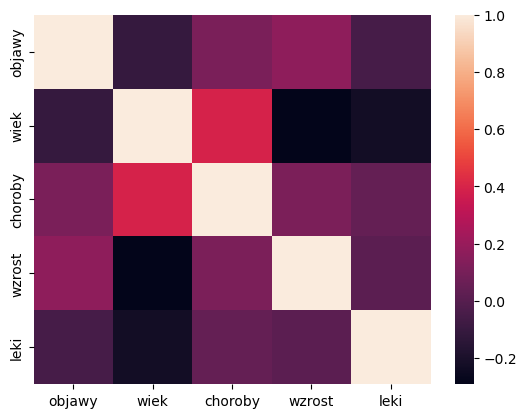

In [21]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Analiza korelacji')

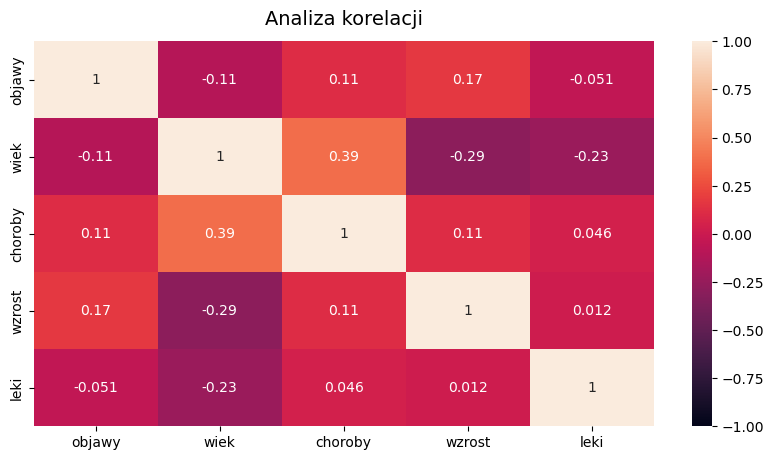

In [22]:
plt.figure(figsize=(10, 5)) 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Analiza korelacji', fontdict={'fontsize':14}, pad=12) 

In [23]:
r = df.corr()
p = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*r.shape)
p = p.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
r.round(2).astype(str) + p

,objawy,wiek,choroby,wzrost,leki
objawy,1.0***,-0.11,0.11,0.17,-0.05
wiek,-0.11,1.0***,0.39***,-0.29**,-0.23*
choroby,0.11,0.39***,1.0***,0.11,0.05
wzrost,0.17,-0.29**,0.11,1.0***,0.01
leki,-0.05,-0.23*,0.05,0.01,1.0***


### 📚 Zadanie 1.
##### Print nie jest jedyną metodą pozwalającą na wyświetlenie danych. Spróbuj wyświetlić dane ze zmiennej df z wykorzystaniem display z biblioteki pandas.

##### 🇬🇧 You can use "display" insted of print. Try to display df variable using display from pandas.

In [26]:
import pandas as pd
display(df)

,objawy,wiek,choroby,wzrost,leki
0,1,NaN,0,170.0,2
1,1,65.0,0,NaN,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
5,1,64.0,0,164.0,1
6,1,54.0,1,178.0,4
7,1,NaN,1,190.0,3
8,3,76.0,1,200.0,2
9,3,54.0,0,198.0,1


### 📚 Zadanie 2.
##### Wypróbuj dwa inne sposoby na wypełnienie brakujących wartości. Wypełnij wszystkie brakujące wartości medianą i zapisz dataframe jako df_3. Wyświetl pod tabelą informację o medianie dla zmiennej wieku oraz wzrostu. Wypełnij wszystkie brakujące wartości jako 0 i zapisz dataframe jako df_4.

##### 🇬🇧 Try two other ways to fill in missing values. Fill  missing values with the median and save as the dataframe "df_3". Display the median  for the age and height variables below the table. Fill  missing values as 0 and write as the dataframe "df_4".

In [1]:
import pandas as pd
import numpy as np

# read the data into a pandas dataframe
df = pd.read_csv("DSP_4.csv", sep = ';')

# fill missing values with median and save as new dataframe df_3
df_3 = df.fillna(df.median())

# display median values for "wiek" and "wzrost"
print("Median age:", df_3["wiek"].median())
print("Median height:", df_3["wzrost"].median())

# display dataframe df_3
display(df_3)
# fill missing values with 0 and save as new dataframe df_4
df_4 = df.fillna(0)

# display dataframe df_4
print("df4")
display(df_4)


Median age: 43.0
Median height: 187.0
df3


,objawy,wiek,choroby,wzrost,leki
0,1,43.0,0,170.0,2
1,1,65.0,0,187.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
5,1,64.0,0,164.0,1
6,1,54.0,1,178.0,4
7,1,43.0,1,190.0,3
8,3,76.0,1,200.0,2
9,3,54.0,0,198.0,1


df4


,objawy,wiek,choroby,wzrost,leki
0,1,0.0,0,170.0,2
1,1,65.0,0,0.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
5,1,64.0,0,164.0,1
6,1,54.0,1,178.0,4
7,1,0.0,1,190.0,3
8,3,76.0,1,200.0,2
9,3,54.0,0,198.0,1


### 📚 Zadanie 3.
##### Przełóż zdobytą wiedzę, żeby dokonać podstawowej eksploracji nowego zestawu danych. Wczytaj dane DSP_5.csv pamiętając o właściwym określeniu separatora. Sprawdź czy są brakujące dane - jeżeli są, to wypełnij je średnią. Przedstaw średnią, wariancję i rozstęp dla zmiennej "hp". Przedstaw tabelę korelacji dla zmiennych. Czy są jakieś wartości, które szczególnie zwracają uwagę?

##### 🇬🇧 Load DSP_5.csv. Check if there are missing data - if neccesary fill them with an average. Show the mean, variance, range for "hp" variable. Show a correlation table for the variables. Is there anything interesting?

In [2]:
import pandas as pd

# Load the data from CSV file
df = pd.read_csv("DSP_5.csv" ,sep = ';')

# Check for missing values
if df.isnull().values.any():
    # Fill missing values with the mean
    df.fillna(df.mean(), inplace=True)

# Compute mean, variance, and range for the "hp" variable
hp_mean = df["hp"].mean()
hp_var = df["hp"].var()
hp_range = df["hp"].max() - df["hp"].min()

# Print the results
print("Mean of hp:", hp_mean)
print("Variance of hp:", hp_var)
print("Range of hp:", hp_range)

# Compute the correlation matrix for all variables
corr_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Mean of hp: 143.51612903225805
Variance of hp: 4379.023933402706
Range of hp: 283.0
Correlation Matrix:
           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.748447  0.681172 -0.864418  0.418684   
cyl  -0.852162  1.000000  0.902033  0.812289 -0.699938  0.776755 -0.591242   
disp -0.847551  0.902033  1.000000  0.771889 -0.710214  0.885379 -0.433698   
hp   -0.748447  0.812289  0.771889  1.000000 -0.477304  0.650904 -0.666273   
drat  0.681172 -0.699938 -0.710214 -0.477304  1.000000 -0.711907  0.091205   
wt   -0.864418  0.776755  0.885379  0.650904 -0.711907  1.000000 -0.176005   
qsec  0.418684 -0.591242 -0.433698 -0.666273  0.091205 -0.176005  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.706256  0.440278 -0.557854  0.744535   
am    0.599832 -0.522607 -0.591227 -0.211707  0.712711 -0.680956 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.084144  0.699610 -0.580341 -0.212682   
carb -0.550925  0.526988  0.394977  0.

C:\Users\PC\AppData\Local\Temp\ipykernel_11456\3144125951.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


### 📚 Zadanie 4.
##### 1. Wczytaj dane „DSP_8.csv”. Jest to zbiór danych Heart Attack Analysis & Prediction Dataset (aut. Rashik Rahman) dostępny w Kaggle. Zadbaj o odpowiednie formatowanie liczb dziesiętnych.
##### 2.	Napisz kod, który zwróci informację dotyczącą: a.	liczby kolumn (wraz z ich nazwami), b.	liczby wierszy (obserwacji), c.	ewentualnych braków danych, d.	średniego wieku oraz odchylenia standardowego w grupie kobiet oraz w grupie mężczyzn, e.	odsetka mężczyzn w zbiorze danych, f.	liczby kobiet w wieku od 45 do 50 lat, g.	korelacji pomiędzy zmiennymi, ale wyłącznie dla osób, dla których w zbiorze danych określono, że ich EKG w czasie spoczynku jest w normie (czyli w kolumnie RestingECG występuje obserwacja „Normal”).

##### 🇬🇧 1. Load the "DSP_8.csv" data. This is the Heart Attack Analysis & Prediction Dataset (aut. Rashik Rahman) available from Kaggle. Make sure that decimal numbers are properly formatted.
##### 2. Write a code that will return information: a. The number of columns (with their names), b. The number of rows (observations), c. Any missing data, d. The mean age and standard deviation in two separate gorups (men&women), e. the percentage of men in the dataset, f. the number of women aged 45 to 50 years, g. correlation between the variables, but only for people with their ECG at rest is normal (when in the RestingECG column, "Normal" appears).

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("DSP_8.csv", decimal=",")

# Get column names and number of rows
print(f"Columns: {list(df.columns)}, Total Rows: {len(df)}")

# Check for missing data
print("Missing data:")
print(df.isnull().sum())

# Compute mean age and standard deviation by gender
men_age_mean = df.loc[df['Sex'] ==  "M", 'Age'].mean()
men_age_std = df.loc[df['Sex'] == "M", 'Age'].std()
women_age_mean = df.loc[df['Sex'] == "F", 'Age'].mean()
women_age_std = df.loc[df['Sex'] == "F", 'Age'].std()

print(f"Mean age for men: {men_age_mean:.2f}, Standard deviation for men: {men_age_std:.2f}")
print(f"Mean age for women: {women_age_mean:.2f}, Standard deviation for women: {women_age_std:.2f}")

# Compute percentage of men in the dataset
percentage_men = (len(df[df['Sex'] == "M"]) / len(df)) * 100
print(f"Percentage of men in the dataset: {percentage_men:.2f}%")

# Count number of women aged 45 to 50 years
num_women_45_to_50 = len(df[(df['Sex'] == "F") & (df['Age'] >= 45) & (df['Age'] <= 50)])
print(f"Number of women aged 45 to 50 years: {num_women_45_to_50}")

# Compute correlation between variables for people with normal ECG at rest
corr_df = df[df['RestingECG'] == 'Normal'].corr()
print("Correlation between variables for people with normal ECG at rest:")
print(corr_df)


Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'], Total Rows: 918
Missing data:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Mean age for men: 53.78, Standard deviation for men: 9.40
Mean age for women: 52.49, Standard deviation for women: 9.52
Percentage of men in the dataset: 78.98%
Number of women aged 45 to 50 years: 36
Correlation between variables for people with normal ECG at rest:
                   Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age           1.000000   0.230469    -0.129005   0.183535 -0.380244   
RestingBP     0.230469   1.000000     0.142830  -0.010983 -0.124514   
Cholesterol  -0.129005   0.142830     1.000000  -0.351044  0.224505   
Fas